<a href="https://colab.research.google.com/github/Chirag314/Tabular-Data-Series/blob/main/TPMay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Tabular play ground series May.
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Train data
train = pd.read_csv('/content/train.csv', sep=',', index_col='id')
train1=train.copy()       #Copy training data in case we need original data later.
train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0.0,0.0,0.0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0.0,0.0,1.0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0.0,2.0,1.0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0.0,0.0,1.0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0.0,1.0,1.0


In [5]:
# Test data
test = pd.read_csv('/content/test.csv',sep=',',index_col='id')
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6.0,6.0,0.0,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0.0,0.0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1.0,3.0,4.0,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1.0,0.0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3.0,3.0,4.0,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0.0,1.0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0.0,0.0,4.0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0.0,0.0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2.0,2.0,2.0,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0.0,2.0


In [6]:
# Check data
train.info()
# It seems all except f_27 are float type . F_27 is object string type. Also there are no missing values in any columns.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71266 entries, 0 to 71265
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    71266 non-null  float64
 1   f_01    71266 non-null  float64
 2   f_02    71266 non-null  float64
 3   f_03    71266 non-null  float64
 4   f_04    71266 non-null  float64
 5   f_05    71266 non-null  float64
 6   f_06    71266 non-null  float64
 7   f_07    71266 non-null  int64  
 8   f_08    71266 non-null  int64  
 9   f_09    71266 non-null  int64  
 10  f_10    71266 non-null  int64  
 11  f_11    71266 non-null  int64  
 12  f_12    71266 non-null  int64  
 13  f_13    71266 non-null  int64  
 14  f_14    71266 non-null  int64  
 15  f_15    71266 non-null  int64  
 16  f_16    71266 non-null  int64  
 17  f_17    71266 non-null  int64  
 18  f_18    71266 non-null  int64  
 19  f_19    71266 non-null  float64
 20  f_20    71266 non-null  float64
 21  f_21    71266 non-null  float64
 22

In [7]:
train.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_26,f_28,f_29,f_30,target
count,71266.000000,71266.000000,71266.000000,71266.000000,71266.000000,71266.000000,71266.000000,71266.000000,71266.000000,71266.000000,...,71266.000000,71266.000000,71266.000000,71266.000000,71266.000000,71265.000000,71265.000000,71265.000000,71265.000000,71265.000000
mean,-0.004896,-0.000856,-0.001351,-0.002986,-0.001305,-0.000840,-0.003010,2.029776,2.061698,2.363020,...,-0.190603,-0.150801,-0.003854,-0.347092,-0.337844,0.351404,-1.318392,0.347085,1.000603,0.485414
std,0.997120,0.998826,0.997677,1.001614,0.995184,0.995886,0.999687,1.648408,1.588060,1.637487,...,2.405109,2.486732,2.455997,2.451215,2.387022,2.484048,239.025888,0.476046,0.820300,0.499791
min,-4.171053,-4.015642,-4.134506,-4.197339,-4.684851,-4.576952,-4.306786,0.000000,0.000000,0.000000,...,-10.971913,-10.683793,-10.700972,-10.393312,-11.107958,-12.333948,-1229.753052,0.000000,0.000000,0.000000
25%,-0.678661,-0.677908,-0.676636,-0.677852,-0.668568,-0.668583,-0.684756,1.000000,1.000000,1.000000,...,-1.806697,-1.805953,-1.633163,-2.004187,-1.941846,-1.261730,-160.696959,0.000000,0.000000,0.000000
50%,-0.006704,0.001352,-0.000707,-0.003814,-0.001403,0.000965,-0.004536,2.000000,2.000000,2.000000,...,-0.205131,-0.138145,0.034868,-0.356912,-0.336333,0.406259,-2.184531,0.000000,1.000000,0.000000
75%,0.662715,0.673315,0.669227,0.669426,0.671996,0.671251,0.671441,3.000000,3.000000,3.000000,...,1.445381,1.501385,1.666825,1.274594,1.265875,2.025436,157.817979,1.000000,2.000000,1.000000
max,4.299185,3.960967,3.944027,4.230063,3.963865,4.702842,4.040710,12.000000,11.000000,13.000000,...,9.293073,11.030685,10.383024,11.269509,9.549280,10.535765,1229.562577,1.000000,2.000000,1.000000


In [8]:
# Check column names and types
print(' Column names are : {}'.format(train.columns))

print(' Column types are : {}'.format(train.dtypes))

 Column names are : Index(['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_07', 'f_08',
       'f_09', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17',
       'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26',
       'f_27', 'f_28', 'f_29', 'f_30', 'target'],
      dtype='object')
 Column types are : f_00      float64
f_01      float64
f_02      float64
f_03      float64
f_04      float64
f_05      float64
f_06      float64
f_07        int64
f_08        int64
f_09        int64
f_10        int64
f_11        int64
f_12        int64
f_13        int64
f_14        int64
f_15        int64
f_16        int64
f_17        int64
f_18        int64
f_19      float64
f_20      float64
f_21      float64
f_22      float64
f_23      float64
f_24      float64
f_25       object
f_26      float64
f_27       object
f_28      float64
f_29      float64
f_30      float64
target    float64
dtype: object


In [9]:
train.select_dtypes(['float64']).head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_19,f_20,f_21,f_22,f_23,f_24,f_26,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,0.298218,-0.919717,3.058541,-2.540739,0.766952,-2.730628,1.363402,67.609153,0.0,0.0,0.0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,-3.147667,-1.075434,2.179050,2.278315,-0.633658,-1.217077,-0.058316,377.096415,0.0,0.0,1.0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,2.820733,-3.485342,-0.784235,-1.385775,-0.520558,-0.009121,-3.703488,-195.599702,0.0,2.0,1.0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,1.081084,-2.100177,-2.343819,0.572594,-1.653213,1.686035,-0.608601,210.826205,0.0,0.0,1.0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,-0.126179,0.605033,1.133665,-3.912929,-1.430366,2.127649,4.371371,-217.211798,0.0,1.0,1.0


In [10]:
#Convert float to int for memory saving and fast execution
float_list_train = train.select_dtypes(include=[np.float64]).columns
train[float_list_train] = train[float_list_train].astype(np.float32)
int_list_train = train.select_dtypes(include=[np.int64]).columns
train[int_list_train] = train[int_list_train].astype(np.int16)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71266 entries, 0 to 71265
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    71266 non-null  float32
 1   f_01    71266 non-null  float32
 2   f_02    71266 non-null  float32
 3   f_03    71266 non-null  float32
 4   f_04    71266 non-null  float32
 5   f_05    71266 non-null  float32
 6   f_06    71266 non-null  float32
 7   f_07    71266 non-null  int16  
 8   f_08    71266 non-null  int16  
 9   f_09    71266 non-null  int16  
 10  f_10    71266 non-null  int16  
 11  f_11    71266 non-null  int16  
 12  f_12    71266 non-null  int16  
 13  f_13    71266 non-null  int16  
 14  f_14    71266 non-null  int16  
 15  f_15    71266 non-null  int16  
 16  f_16    71266 non-null  int16  
 17  f_17    71266 non-null  int16  
 18  f_18    71266 non-null  int16  
 19  f_19    71266 non-null  float32
 20  f_20    71266 non-null  float32
 21  f_21    71266 non-null  float32
 22

In [11]:
train.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
id,,,,,,,,,,,,,,,,,,,,,
0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,1,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609154,0.0,0.0,0.0
1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,4,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096405,0.0,0.0,1.0
2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,2,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599701,0.0,2.0,1.0
3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,1,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826202,0.0,0.0,1.0
4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,0,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211792,0.0,1.0,1.0


In [12]:
#Convert float to int for memory saving and fast execution for test data also
float_list_test = test.select_dtypes(include=[np.float64]).columns
float_list_test
test[float_list_test] = test[float_list_test].astype(np.float32)
int_list_test = test.select_dtypes(include=[np.int64]).columns
test[int_list_test] = test[int_list_test].astype(np.int16)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74416 entries, 900000 to 974415
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    74416 non-null  float32
 1   f_01    74416 non-null  float32
 2   f_02    74415 non-null  float32
 3   f_03    74415 non-null  float32
 4   f_04    74415 non-null  float32
 5   f_05    74415 non-null  float32
 6   f_06    74415 non-null  float32
 7   f_07    74415 non-null  float32
 8   f_08    74415 non-null  float32
 9   f_09    74415 non-null  float32
 10  f_10    74415 non-null  float32
 11  f_11    74415 non-null  float32
 12  f_12    74415 non-null  float32
 13  f_13    74415 non-null  float32
 14  f_14    74415 non-null  float32
 15  f_15    74415 non-null  float32
 16  f_16    74415 non-null  float32
 17  f_17    74415 non-null  float32
 18  f_18    74415 non-null  float32
 19  f_19    74415 non-null  float32
 20  f_20    74415 non-null  float32
 21  f_21    74415 non-null  float

In [13]:
test.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
id,,,,,,,,,,,,,,,,,,,,,
900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6.0,6.0,0.0,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734204,BAAABADLAC,99.478416,0.0,0.0
900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1.0,3.0,4.0,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993828,1.0,0.0
900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3.0,3.0,4.0,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405624,0.0,1.0
900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0.0,0.0,4.0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293457,0.0,0.0
900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2.0,2.0,2.0,...,0.084906,-0.985736,-0.130467,-3.557894,1.210687,1.861884,AEBBBBDABF,25.629416,0.0,2.0


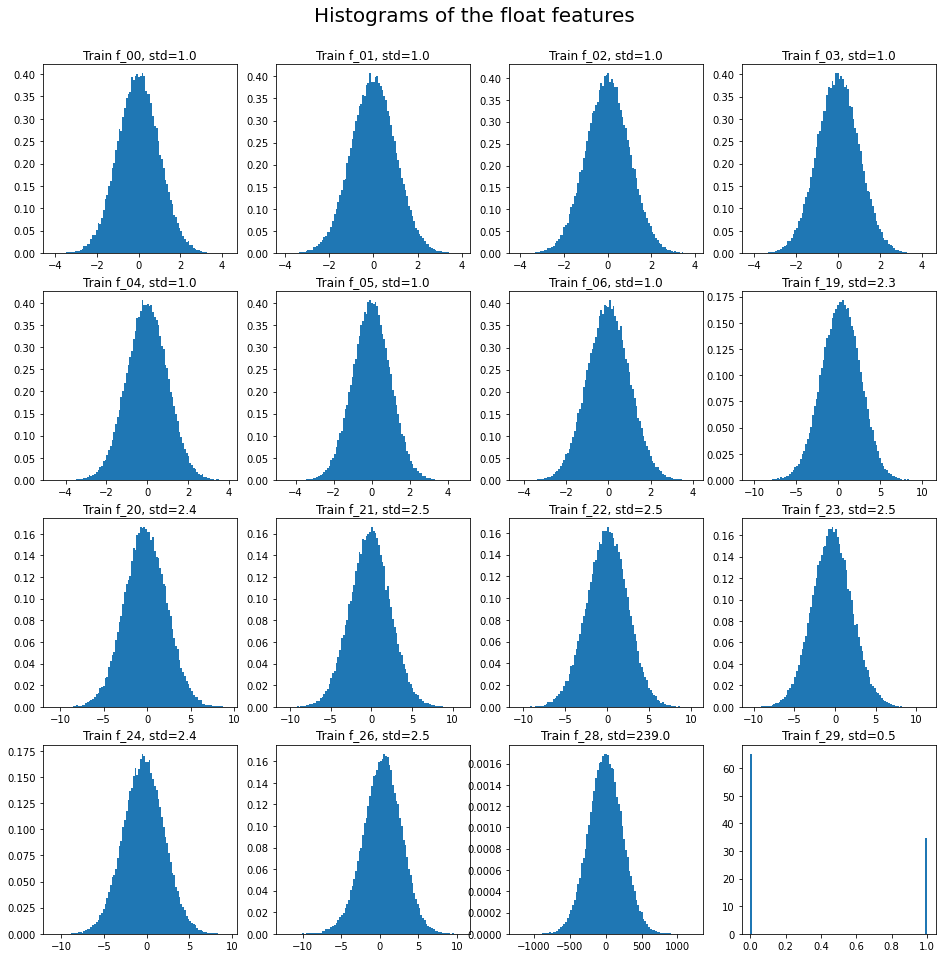

In [22]:
# Check out distribution of features using diagram
# Check float features

fig, axs = plt.subplots(4,4 ,figsize=(16,16))
for f, ax in zip(float_list_train,axs.ravel()):
  ax.hist(train[f], density=True, bins=100)
  ax.set_title(f'Train {f}, std={train[f].std():.1f}')
plt.suptitle('Histograms of the float features',y=0.93,fontsize=20)
plt.show()


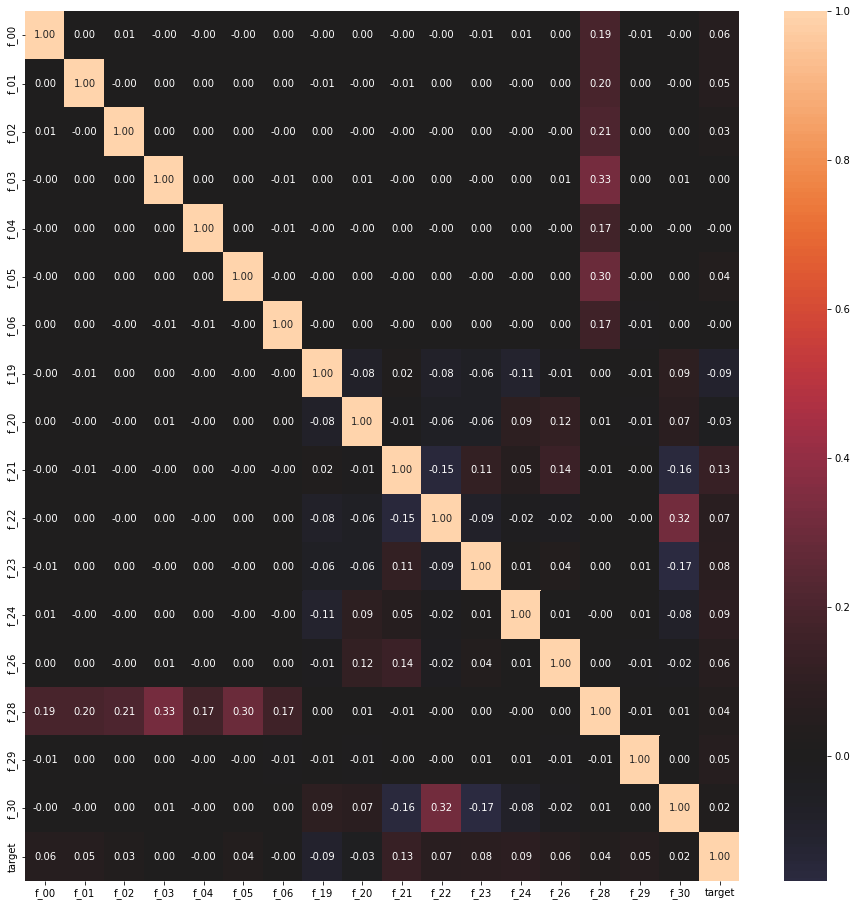

In [23]:
# Correlation matrix of float features
plt.figure(figsize=(16,16))
sns.heatmap(train[float_list_train].corr(),center=0,annot=True,fmt='.2f')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


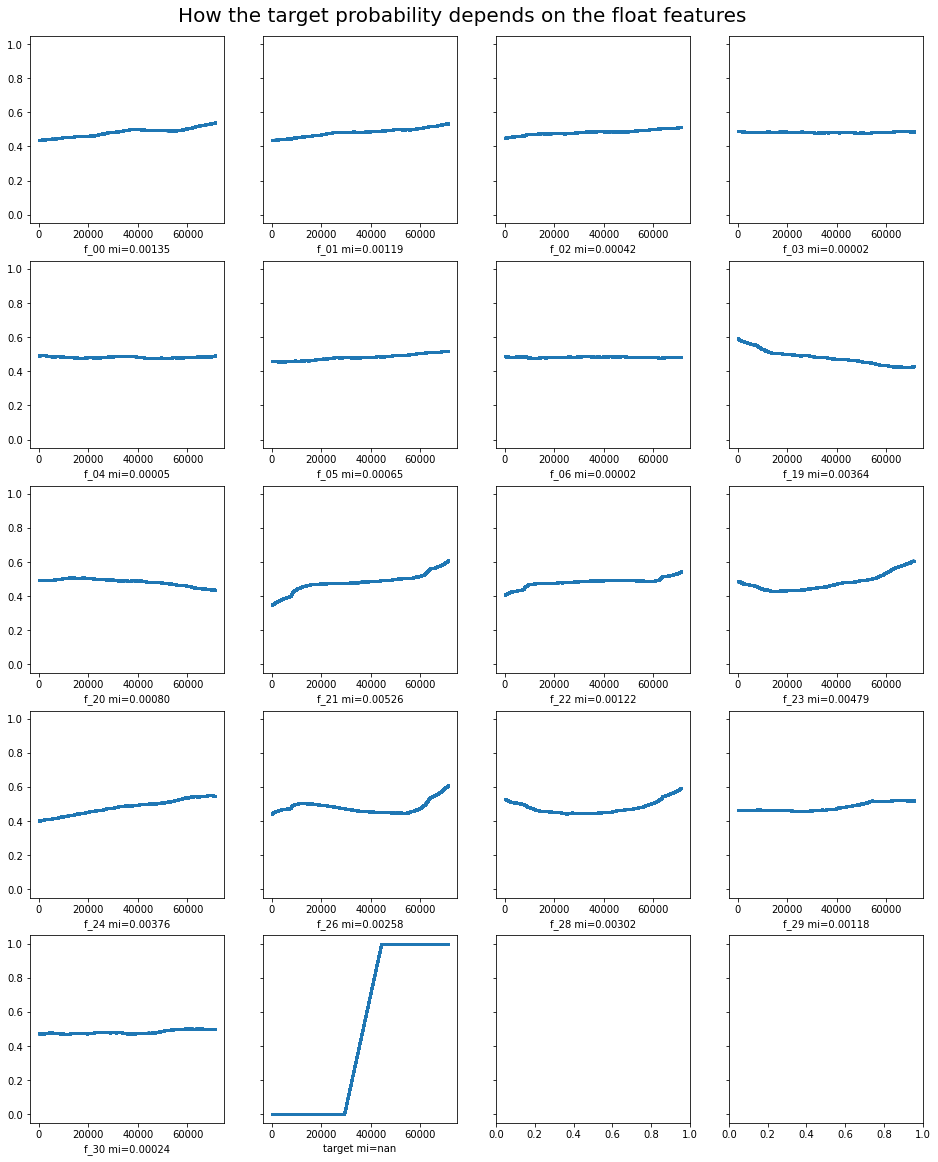

In [25]:
# Plot dependence between every feature and the target
def plot_mutual_info_diagram(df, features, ncols=4, by_quantile=True, mutual_info=True,
                             title='How the target probability depends on single features'):
    def H(p):
        """Entropy of a binary random variable in nat"""
        return -np.log(p) * p - np.log(1-p) * (1-p)
                 
    nrows = (len(features) + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows, ncols, figsize=(16, nrows*4), sharey=True)
    for f, ax in zip(features, axs.ravel()):
        temp = pd.DataFrame({f: df[f].values,
                             'state': df.target.values})
        temp = temp.sort_values(f)
        temp.reset_index(inplace=True)
        rolling_mean = temp.state.rolling(15000, center=True, min_periods=1).mean()
        if by_quantile:
            ax.scatter(temp.index, rolling_mean, s=2)
        else:
            ax.scatter(temp[f], rolling_mean, s=2)
        if mutual_info and by_quantile:
            ax.set_xlabel(f'{f} mi={H(temp.state.mean()) - H(rolling_mean[~rolling_mean.isna()].values).mean():.5f}')
        else:
            ax.set_xlabel(f'{f}')
    plt.suptitle(title, y=0.90, fontsize=20)
    plt.show()

plot_mutual_info_diagram(train, float_list_train,
                         title='How the target probability depends on the float features')

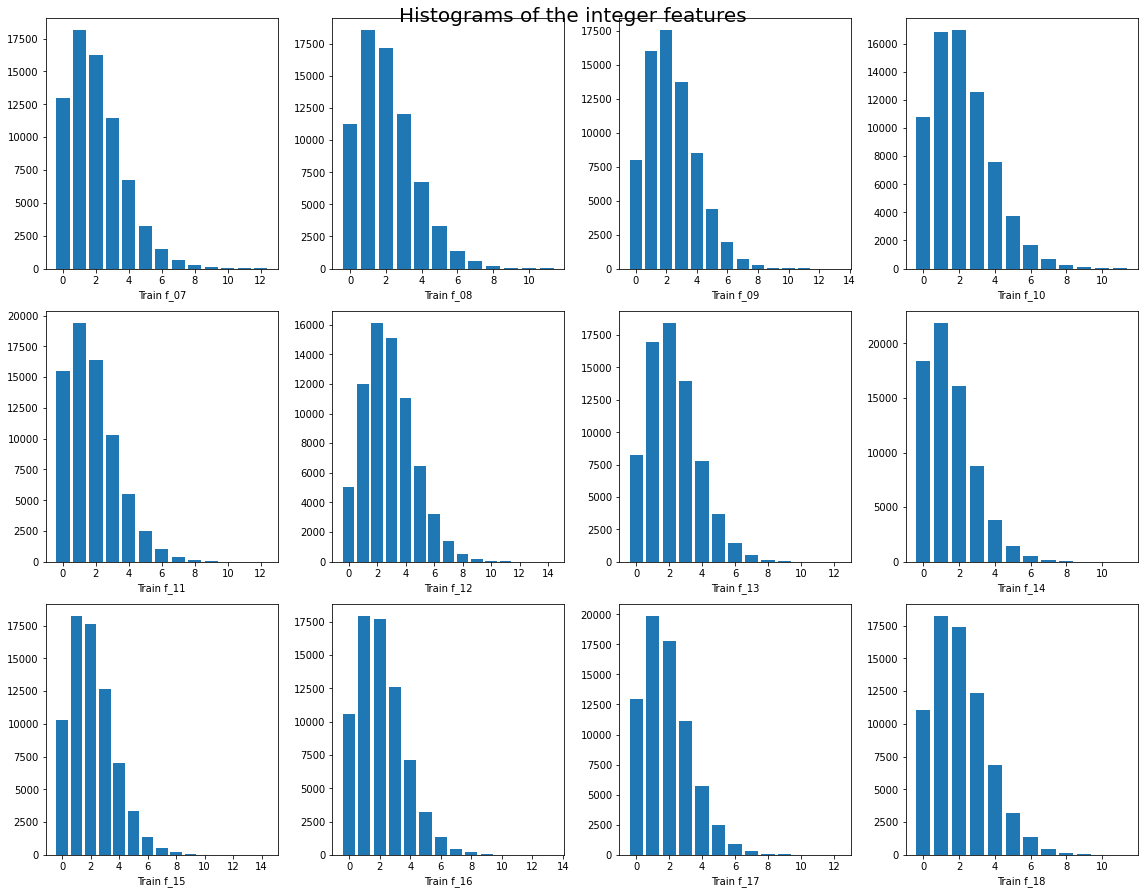

In [26]:
#Check integerfeatures
# Training histograms

from matplotlib.ticker import MaxNLocator

figure = plt.figure(figsize=(16, 16))

for i, f in enumerate(int_list_train):
    plt.subplot(4, 4, i+1)
    ax = plt.gca()
    vc = train[f].value_counts()
    ax.bar(vc.index, vc)
    
    ax.set_xlabel(f'Train {f}')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
plt.suptitle('Histograms of the integer features', y=1.0, fontsize=20)
figure.tight_layout(h_pad=1.0)
plt.show()


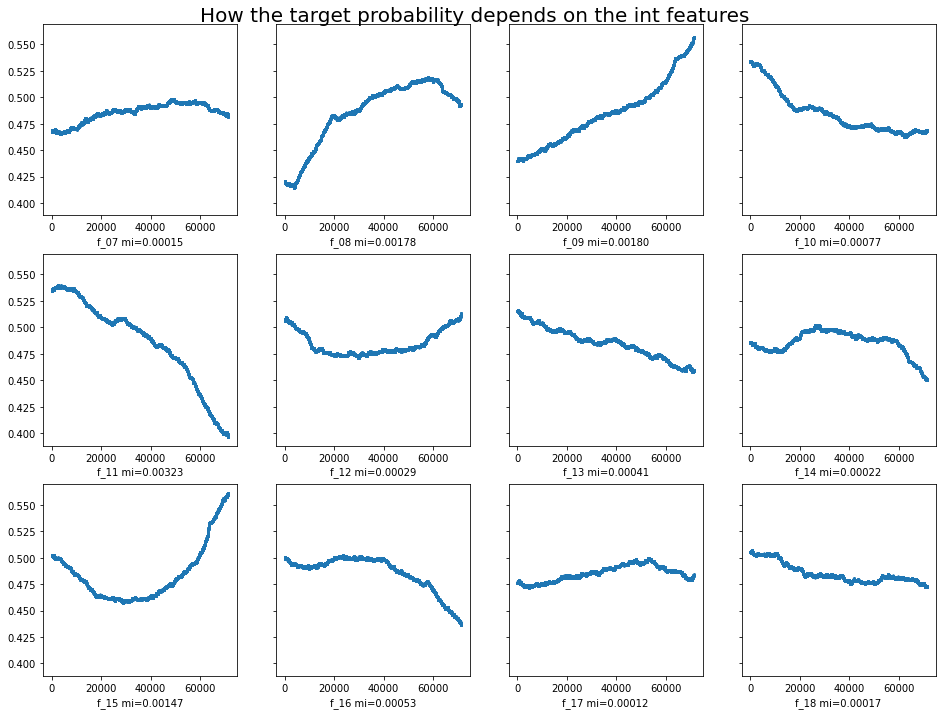

In [27]:
plot_mutual_info_diagram(train, int_list_train,
                         title='How the target probability depends on the int features')

In [28]:
# Check string feature f_27
train['f_27'].value_counts()

BCBAAACGBD    3
ACBBBACQCE    3
ADBAAABJDC    3
ACBCAABECE    3
BCBCCBCQBB    3
             ..
BCBDBBEQDC    1
AGBAAABNBE    1
AABCAADKCB    1
BAABCAENAA    1
BBBBEACIDC    1
Name: f_27, Length: 69872, dtype: int64